In [5]:
import struct  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_first_n_keys(file_path, n):  
    """  
    从指定的二进制文件中读取前n个keys。  
  
    参数:  
    file_path: 二进制文件的路径。  
  
    返回:  
    一个列表，包含读取的前n个64位无符号整型。  
    """  

    uint64_keys_list = []  

    # 打开文件，以二进制模式读取  
    with open(file_path, 'rb') as file:  
        while n > 0:  
            # 每次读取8字节，因为64位无符号整型占用8字节  
            bytes_read = file.read(8)  
            if not bytes_read:  
                # 如果读取不到8字节，说明已经到达文件末尾  
                break  
            # 将读取的8字节数据转换为64位无符号整型，并添加到列表中  
            uint64_keys_list.append(struct.unpack('Q', bytes_read)[0])  
            n -= 1  
    return uint64_keys_list

def read_first_n_ops(file_path, n):  
    """  
    从指定的二进制文件中读取前n个ops。  
  
    参数:  
    file_path: 二进制文件的路径。  
  
    返回:  
    三个列表，分别包含读取的前n个ops中的fetch、insert、delete
    """  

    fetch_list = []
    insert_list = []
    delete_list = []
  
    # 打开文件，以二进制模式读取  
    with open(file_path, 'rb') as file:  
        while n > 0:  
            # 先读1个字节，它表示操作的类型
            op_type = file.read(1)
            op_type = struct.unpack('B', op_type)[0]

            # 每次读取8字节，因为64位无符号整型占用8字节  
            bytes_read = file.read(8)  
            key = struct.unpack('Q', bytes_read)[0]

            if op_type == 0:
                fetch_list.append(key)
            elif op_type == 1:
                insert_list.append(key)
            elif op_type == 2:
                delete_list.append(key)
        
            n -= 1  

    return fetch_list, insert_list, delete_list


In [15]:
ls1, ls2, ls3 = read_first_n_ops("ops", 10000)

s1 = pd.Series(ls1)
s2 = pd.Series(ls2)
s3 = pd.Series(ls3)

print(len(ls1), len(ls2), len(ls3))

10000 0 0


/tmp/ipykernel_1681866/3447182291.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s2 = pd.Series(ls2)
/tmp/ipykernel_1681866/3447182291.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s3 = pd.Series(ls3)


Text(0.5, 0, 'the rank of a key')

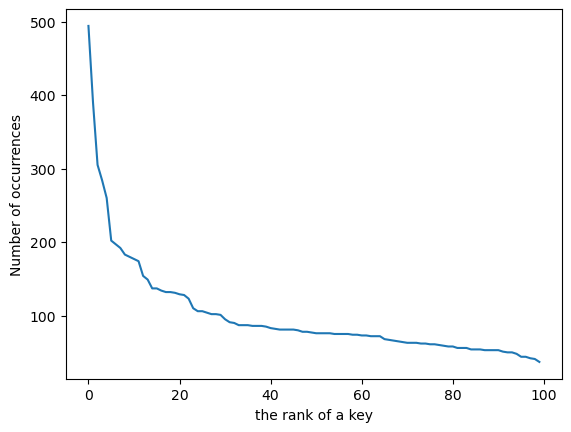

In [14]:
plt.plot(np.arange(100), list(s1.value_counts()))
plt.ylabel("Number of occurrences")
plt.xlabel("the rank of a key")
# 下图为zipf=0.5，100个键，共50000次查询

Text(0.5, 0, 'the rank of a key')

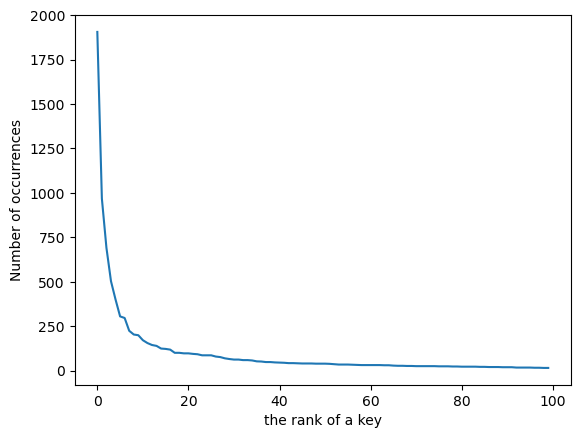

In [9]:
plt.plot(np.arange(100), list(s1.value_counts()))
plt.ylabel("Number of occurrences")
plt.xlabel("the rank of a key")
# 下图为zipf=1，100个键，共50000次查询

Text(0.5, 0, 'the rank of a key')

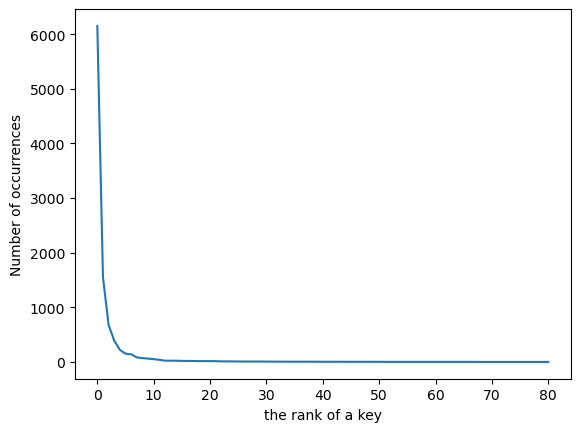

In [17]:
plt.plot(np.arange(81), list(s1.value_counts()))
plt.ylabel("Number of occurrences")
plt.xlabel("the rank of a key")
# 下图为zipf=2，100个键，共50000次查询